We'll use NumPy and Matplotlib for the Python implementation. If you don't have these libraries installed, you can install them using pip:

In [1]:
pip install numpy matplotlib

Now let's write the core code for simulating a LIF neuron!

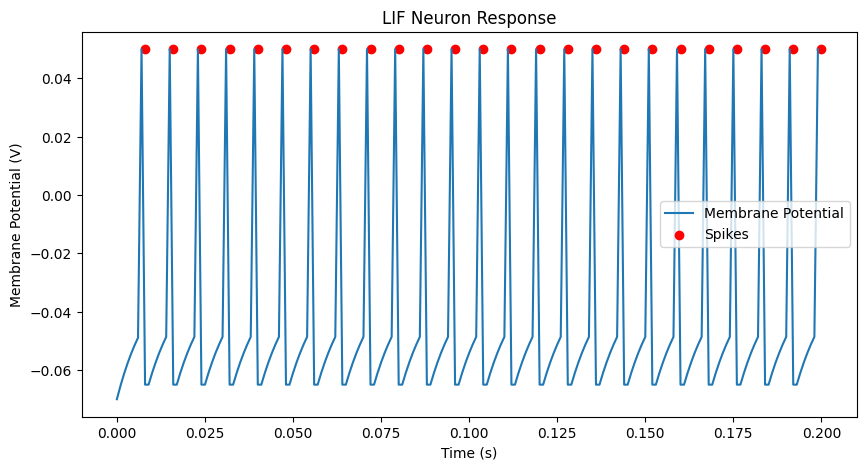

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Create a function to simulate a LIF neuron: specify input and output (documentation)
def fixed_input_lif(I, duration, dt):
    #  generate post LIF response (spike train) given a fixed current input
    #  Input:  variable_name          explanation
    #          I                      Steady current input level (A)
    #          duration               Duration of simulation (s)
    #          dt                     Time bin size of stimulation (s)

    #  Output: variable_name          explanation
    #          spikeTime              spike timing of the LIF neuron (s)
    #          V                      voltage trace of the LIF neuron (V)

    # Setting up the simulation
    # First, set up time (number of bins)
    nBins = int(duration / dt)
    # Set up the clock for storing spike time
    clock = np.arange(1, nBins + 1)  # unit determined by dt

    # Intrinsic parameters of the postsynaptic neuron / synapse
    g_m = 25e-9  # S -> nS
    c_m = 250e-12  # F -> pF
    V_th = -50e-3  # V -> mV
    V_reset = -65e-3  # V -> mV
    V_spike = 50e-3  # V -> mV
    V_rest = -70e-3  # V -> mV

    # Check if input length matches
    nBins_I = len(I)
    if nBins_I != nBins:
        nBins = nBins + 1
        if nBins_I != nBins:
            raise ValueError('Simulation input length does not match. Try changing duration or input length.')

    # Simulate LIF using Euler's method
    # Create space (a binary or zeros array of length nBins) for storing whether the neuron spiked in each time bin
    spikeTrain = np.zeros(nBins, dtype=int)
    # Create space (zeros of length nBins + 2) for storing membrane potential V_m. The extra 2 bins are for V_reset
    V_m = np.zeros(nBins + 2)
    # Set the initial membrane potential to be resting potential
    V_m[0] = V_rest
    # Set the initial time to be 0
    t = 0
    # Start the simulation
    while t < len(clock):
        # Calculate the change of V_m for the next time bin t+1, using the LIF model and Euler's method
        dV_m = (-g_m / c_m * (V_m[t] - V_reset) + I[t] / c_m) * dt
        # Update V_m using Euler's method
        V_m[t + 1] = V_m[t] + dV_m

        # If membrane potential is higher than AP threshold, generate a spike!
        if V_m[t] > V_th:
            V_m[t + 1] = V_spike
            V_m[t + 2] = V_reset
            V_m[t + 3] = V_reset
            spikeTrain[t + 1] = 1
            t += 2  # Update timer to account for the duration for V_reset
        # Make sure the current timer is not longer than nBins
        if t >= nBins:
            break
        t += 1  # Update timer to move to the next time bin to be updated

    spikeTime = clock[spikeTrain > 0] * dt
    return spikeTime, V_m

# Example usage:
duration = 0.2  # s
dt = 0.001  # s (1 ms)
time = np.arange(0, duration, dt)
I = np.ones(len(time)) * 1e-9  # Steady current input level of 1 nA

spikeTime, V_m = fixed_input_lif(I, duration, dt)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, V_m[:len(time)], label='Membrane Potential')
plt.scatter(spikeTime, np.full(len(spikeTime), 0.05), color='red', label='Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.title('LIF Neuron Response')
plt.show()

The code simulates the LIF neuron response to different current inputs and visualizes the membrane potential over time. Additionally, it quantifies the firing rate of the LIF neuron as a function of the current input level.

Text(0, 0.5, 'V_m (V)')

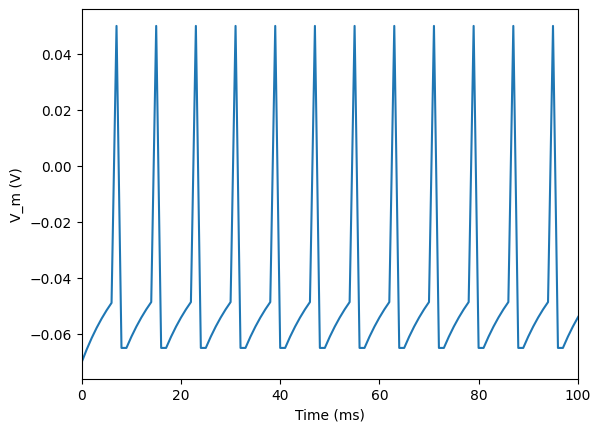

In [4]:
# Set up simulation time
duration = 1
dt = 0.001
nBins = int(duration / dt)

# Case 1.1: Steady current injection
I_0 = 1e-9
I = np.ones(nBins) * I_0
spikeTime, V_m = fixed_input_lif(I, duration, dt)

# Plot
plt.figure()
plt.plot(V_m)
plt.xlim([0, 100])
plt.xlabel('Time (ms)')
plt.ylabel('V_m (V)')

Text(0, 0.5, 'V_m (V)')

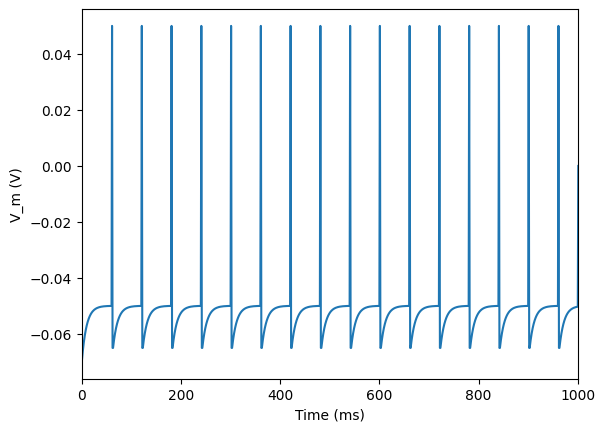

In [5]:
# Case 1.2: Steady current injection
I_0 = 3.76e-10
I = np.ones(nBins) * I_0
spikeTime, V_m = fixed_input_lif(I, duration, dt)

# Plot
plt.figure()
plt.plot(V_m)
plt.xlim([0, 1000])
plt.xlabel('Time (ms)')
plt.ylabel('V_m (V)')

Text(0, 0.5, 'V_m (V)')

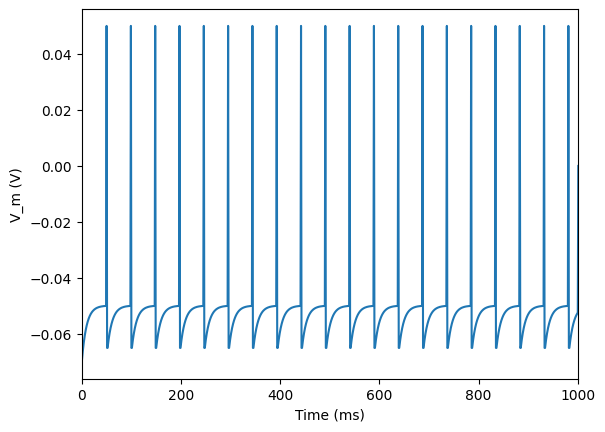

In [6]:
# Case 1.3: Steady current injection
I_0 = 3.78e-10
I = np.ones(nBins) * I_0
spikeTime, V_m = fixed_input_lif(I, duration, dt)

# Plot
plt.figure()
plt.plot(V_m)
plt.xlim([0, 1000])
plt.xlabel('Time (ms)')
plt.ylabel('V_m (V)')


Text(0.5, 0, 'Time (ms)')

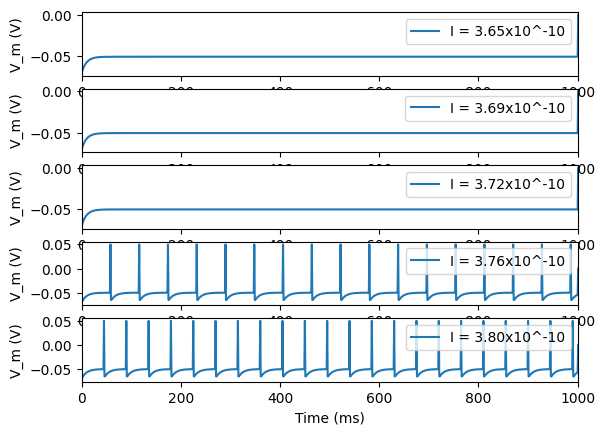

In [7]:
# Case 2: trying different current levels all at once!
nI0 = 5
I_0_list = np.linspace(3.65, 3.8, nI0) * 1e-10

plt.figure()
for i, I_0 in enumerate(I_0_list):
    plt.subplot(nI0, 1, i+1)
    I = np.ones(nBins) * I_0
    spikeTime, V_m = fixed_input_lif(I, duration, dt)

    # Plot
    plt.plot(V_m)
    plt.xlim([0, 1000])
    plt.ylabel('V_m (V)')
    plt.legend([f'I = {I_0 * 1e10:.2f}x10^-10'])
plt.xlabel('Time (ms)')

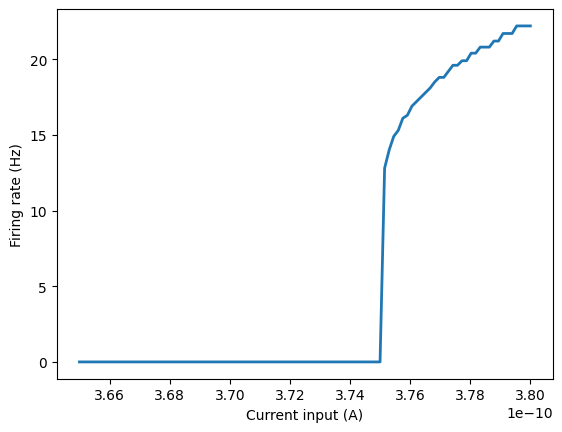

In [8]:
# Case 3: quantification of the number of LIF firing rate as a function of current input level
duration = 10  # s
nBins = int(np.floor(duration /dt))
nI0 = 100
I_0_list = np.linspace(3.65, 3.8, nI0) * 1e-10  # A

firing_rate_list = np.zeros(nI0)
for i, I_0 in enumerate(I_0_list):
    I = np.ones(nBins) * I_0
    spikeTime, V_m = fixed_input_lif(I, duration, dt)
    nSpike = len(spikeTime)
    firing_rate_list[i] = nSpike / duration

plt.figure()
plt.plot(I_0_list, firing_rate_list, linewidth=2)
plt.xlabel('Current input (A)')
plt.ylabel('Firing rate (Hz)')

plt.show()